# Contexto 🏘️

Notebook voltado ao estudo da regressão linear voltada ao estudo do preço de casas nos EUA, por meio da qual buscará compreender o efeito que as variáveis explicativas apresenta na resposta (o preço das casas), bem como o seu nível de significância.

## Importando biliotecas 📚

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [ ]:
df = pd.read_csv('/content/Preços_de_casas.csv')

### Realizando a primeira exploração dos dados

Etapa de verificação do formato do dataframe, suas linhas e dimensionalidade, informações relativas aos tipos de suas colunas e verificação de dados nulos ou não disponíveis, além de duplicados.

In [ ]:
df.shape

(1438, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
df.isnull().sum()

Id                                0
area_primeiro_andar               0
existe_segundo_andar              0
area_segundo_andar                0
quantidade_banheiros              0
capacidade_carros_garagem         0
qualidade_da_cozinha_Excelente    0
preco_de_venda                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [ ]:
# Como a coluna Id serve apenas como
# um identificador, de modo que não irá
# contribuir com a análise, ela pode ser
# excluida.

df = df.drop('Id', axis = 1)

### Analisando a correlação das variáveis presentes

In [ ]:
corr = df.corr()
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

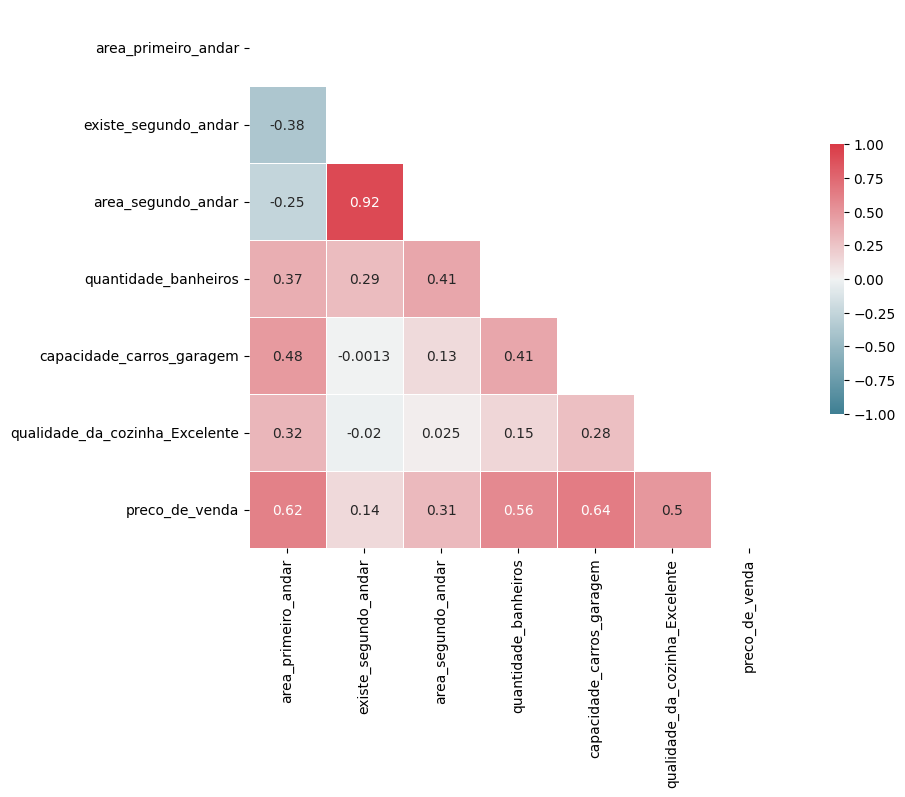

In [ ]:
# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 7))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

## Visualizando a dispersão dos dados

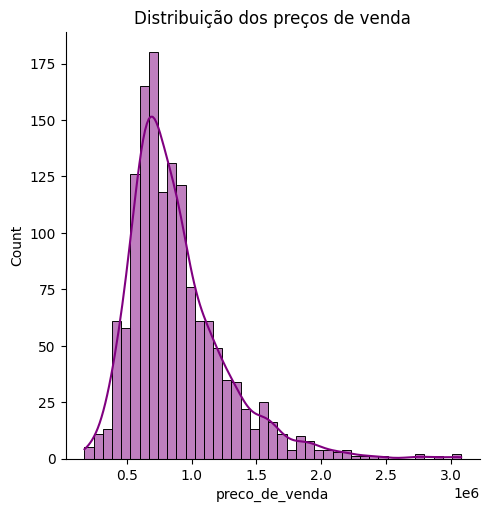

In [ ]:
# Identificando a distribuição da variável resposta :

sns.displot(df['preco_de_venda'], kde = True, color='purple')
plt.title('Distribuição dos preços de venda')
plt.show()

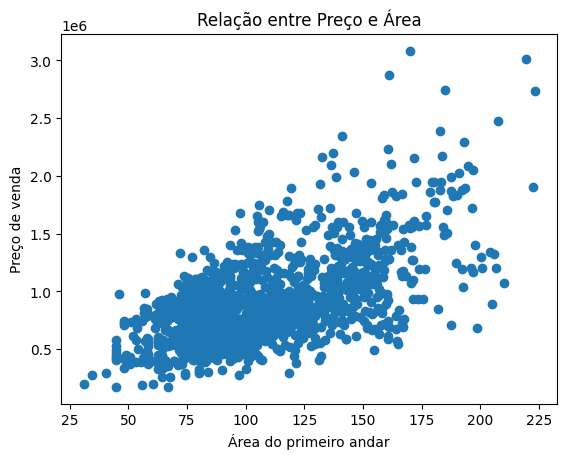

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Identificando a relação das variáveis explicativas
# em relação à variável resposta:

plt.scatter(df['area_primeiro_andar'], df['preco_de_venda'])
plt.title('Relação entre Preço e Área')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')

plt.figure(figsize=(15, 10))
plt.show()

In [ ]:
# Identificando a melhor reta que explica a dispersão dos dados,
# utilizando a biblioteca plotly:

px.scatter(df, x='area_primeiro_andar', y='preco_de_venda',
           trendline_color_override='red', trendline='ols')

## Criando um modelo de regressão linear e identificando seus coeficientes

Criando um modelo que consiga analisar os dados, como forma de criar a melhor função matemática que relacione as variáveis explicativas com a variável resposta.

Essa etapa passa pelo processo de treino e teste, no qual reservamos uma porção dos dados para que esse modelo treine e se ajuste, de modo a conseguir conceber a melhor função para os dados de teste. O ideal é que ele consiga generalizar, conseguindo compreender a função efetiva para diversos casos.

In [ ]:
# Separando os dados em treino e teste,
# segmentando antes em X e y:

y = df['preco_de_venda']
X = df.drop(columns = 'preco_de_venda', axis = 1)

SEED = 22

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state= SEED)

In [ ]:
df_train = pd.DataFrame(data = X_train)
df_train['preco_de_venda'] = y_train

df_train.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
33,157.9300,0,0.0000,1,447,0,815915.0
553,108.0427,1,47.4719,2,396,0,912050.0
1160,76.1780,1,48.5867,1,186,0,763657.0
98,113.8025,0,0.0000,1,0,0,635723.5
1075,111.4800,0,0.0000,1,884,0,719780.0


In [ ]:
# Ajustando a reta:
modelo = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

In [ ]:
# Analisando os coeficientes (intensidade, direção, significância):

# Intensidade :
modelo.params

Intercept              128273.670604
area_primeiro_andar      7006.697990
dtype: float64

O método params ajuda a compreender que o preço possui uma taxa variação de, aproximadamente, 7132.83 reais, pois ele representa o ângulo de inclinação da reta relacionada ao preço e área do primeiro andar, de modo  a dizer que, se não há área construída, o valor tende a ser aproximadamente 118281.71 reais.

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     736.7
Date:                Fri, 24 May 2024   Prob (F-statistic):          9.80e-126
Time:                        23:25:22   Log-Likelihood:                -16093.
No. Observations:                1150   AIC:                         3.219e+04
Df Residuals:                    1148   BIC:                         3.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.283e+05   2

Possuo o sumário do modelo, o qual me permite analisar outras variáveis significativas relevantes, como o valor-p, que mensura o nível de significância estatística do termo analisado, bem como o seu intervalo de confiança, além de seus valores, que já foram encontrados por meio do método params.

Mas como posso identificar que o modelo criado é representativo à variável resposta ? Em outras palavras, como mensuro o grau de explicação das variáveis explicativas ? Para encontrar tal grau, utiliza-se do R², métrica que auxilia na compreensão da correlação entre a(s) variável(eis) explicativas presente(s) em relação à resposta.

O R² é dado pela diferença de 1 pela razão da variação explicada (aquilo que o modelo produz com base em suas variáveis explicativas) e pela variação total.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

In [ ]:
# Identificando o nível de explicação da área do primeiro andar
# em relação ao preço da casa. Compreende-se que apresenta um percentual
# de aproximadamente 40% de explicação, evidenciando que pode haver a
# presença de outras variáveis que ajudam a explicar a variável resposta.

modelo.rsquared.round(3)

0.391

## Obtendo o R² da previsão

In [ ]:
# Prevendo y com o modelo:
y_predict = modelo.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict).round(3)
r2_train = modelo.rsquared.round(3)

In [ ]:
print(f'R² da previsão do modelo : {r2} ')
print(f'R² do treino do modelo : {r2_train}')

R² da previsão do modelo : 0.332 
R² do treino do modelo : 0.391


## Identificando outras relações com a variável preço

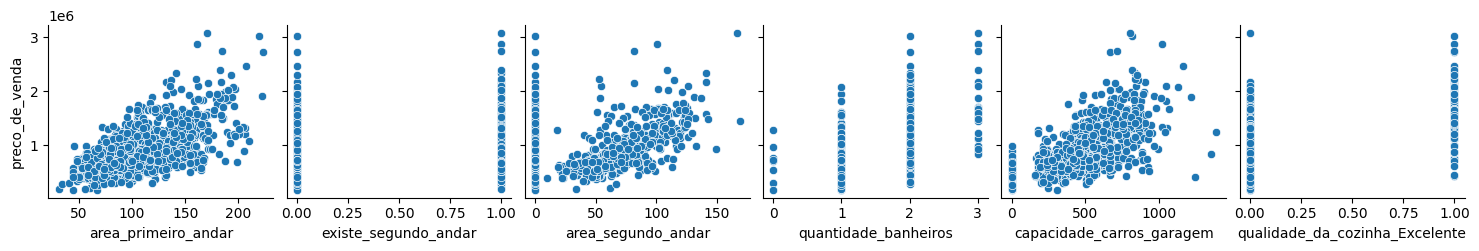

In [ ]:
sns.pairplot(df, y_vars = 'preco_de_venda', x_vars = df.drop('preco_de_venda', axis = 1))



In [ ]:
# Adicionando uma constante ao dataframe
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
33,1.0,157.9300,0,0.0000,1,447,0
553,1.0,108.0427,1,47.4719,2,396,0
1160,1.0,76.1780,1,48.5867,1,186,0
98,1.0,113.8025,0,0.0000,1,0,0
1075,1.0,111.4800,0,0.0000,1,884,0


In [ ]:
modelo = sm.OLS(y_train, X_train).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     537.7
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        23:25:27   Log-Likelihood:                -15607.
No. Observations:                1150   AIC:                         3.123e+04
Df Residuals:                    1143   BIC:                         3.126e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Multicolinearidade

Analisando o sumário realizado pelo modelo treinado, o qual compreende todas as colunas da porção de treino, é possível perceber em **Notes** a presença do índice 2, que alerta para a possível existência de multicolinearidade.

A multicolinearidade é quando as variáveis explicativas do modelo apresentam informações correlatas, passíveis de produzir redundância. Por exemplo, se eu pretendesse estimar o valor de carros e existisse nas variáveis explicativas duas colunas, sendo idade do veículo e quilometragem, faria sentido manter as duas ?

De modo geral não, pois ambas apresentam uma relação direta e proporcional entre si, na medida em que um carro mais antigo normalmente apresenta alta quilometragem e vice-versa. Nesse sentido, uma das colunas poderiam ser excluidas. Mas por quê?

Costuma-se remover colunas que apresentam colinearidade, pois elas fornecem ao modelo redundância, que, além de provocar no aumento de dimensionalidade desnecessário e em custos de processamento, deixa o modelo impreciso, o qual não será capaz de identificar a real influência das variáveis na produção da variável resposta por exemplo.

Em virtude disso, após a notificação do sumário, faz-se necessário analisarmos a correlação entre as variáveis e excluir aquelas que parecerem redundantes.

In [ ]:
X_train.drop('const', axis = 1).corr()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
area_primeiro_andar,1.000000,-0.371629,-0.246492,0.374985,0.473760,0.336790
existe_segundo_andar,-0.371629,1.000000,0.917646,0.287540,0.002897,-0.040842
area_segundo_andar,-0.246492,0.917646,1.000000,0.404552,0.139884,0.004956
quantidade_banheiros,0.374985,0.287540,0.404552,1.000000,0.420953,0.149057
capacidade_carros_garagem,0.473760,0.002897,0.139884,0.420953,1.000000,0.279666
qualidade_da_cozinha_Excelente,0.336790,-0.040842,0.004956,0.149057,0.279666,1.000000


Analisando a tabela de correlação, nota-se que as variáveis que apresentam maior correlação entre si capaz de produzir redundância ao modelo é `existe_segundo_andar` e `area_segundo_andar`.

In [ ]:
# Retirando-se do dataframe de treino
# a variável redundante :

X_train = X_train.drop('area_segundo_andar', axis = 1)

In [ ]:
# Treinando o novo modelo criado :
modelo = sm.OLS(y_train, X_train).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     565.4
Date:                Fri, 24 May 2024   Prob (F-statistic):          4.31e-306
Time:                        23:25:27   Log-Likelihood:                -15663.
No. Observations:                1150   AIC:                         3.134e+04
Df Residuals:                    1144   BIC:                         3.137e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Ainda que Notes acuse a possível existência de multicolinearidade, uma vez que a correlação das outras variáveis tem valor máximo inferior a 50%, irei manter o dataset de treino com as respectivas variáveis.

In [ ]:
# Analisando a contribuição isolada que cada
# variável produz no preço, segundo o modelo
# criado :

modelo.params

const                            -167595.539425
area_primeiro_andar                 4806.356523
existe_segundo_andar              185415.067555
quantidade_banheiros              128220.871701
capacidade_carros_garagem            487.871705
qualidade_da_cozinha_Excelente    386445.845276
dtype: float64

Segundo essa tabela, tem-se o valor médio do quanto cada variável isolada, deixando as demais constantes durante a sua análise, contribui para o preço do imóvel.

Por exemplo, por meio dela sabe-se que a qualidade do banheiro representa um ganho substancial do que a quantidade de banheiros, pois a partir dela encontramos o valor de 383k, quando comparado com 93.414k. Por outro lado, observa-se a contribuição que cada m² apresenta na formação dos preços, de modo que a área para o primeiro andar representa um ganho de aproximadamente 5k, enquanto que o segundo um ganho de 2960k.



## Identificando o R² com o novo modelo


In [ ]:
# Excluindo a coluna que fora excluida
# na porção de treinamento no dataset
# de teste:

X_test = X_test.drop('area_segundo_andar', axis = 1)

In [ ]:
X_test.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
852,1.0,143.7163,1,2,672,0
1332,1.0,73.0194,1,1,624,0
470,1.0,192.2101,1,2,694,1
925,1.0,94.9438,1,2,390,0
597,1.0,103.3048,1,3,230,1


In [ ]:
# Prevendo com o modelo criado:
y_predict_train = modelo.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_predict_train).round(3)
r2_train = modelo.rsquared.round(3)

In [ ]:
print(f'R² da previsão do modelo : {r2} ')
print(f'R² do treino do modelo : {r2_train}')

R² da previsão do modelo : 0.696 
R² do treino do modelo : 0.712


Analisando o R² tanto do treino quanto do teste, nota-se que ambos estão próximos, que é um bom sinal, pois indica que o modelo consegue generalizar para dados que previamente não foram por ele vistos.

Se recapitular, antes de realizar a inserção de mais variáveis no modelo de regressão, o R² de treino era superior ao do teste, indicando que nessa etapa o modelo estava perdendo a sua precisão quando comparado em seu treino.  

## Prevendo o valor para novas casas com base no modelo criado

In [ ]:
df_novas_casas = pd.read_csv('/content/Novas_casas.csv', sep = ';')

In [ ]:
df_novas_casas.shape

(10, 5)

In [ ]:
df_novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [ ]:
df_novas_casas = sm.add_constant(df_novas_casas)

In [ ]:
# Prevendo o valor para casas
# do novo dataframe :
pred_values = modelo.predict(df_novas_casas)

# Adicionando os preços previstos ao dataframe :
df_novas_casas['preco_de_venda'] = pred_values

# Exibindo o dataframe :
df_novas_casas

,const,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente,preco_de_venda
0,1.0,1,150,1,2,1,2.816511e+07
1,1.0,2,180,0,3,1,3.360464e+07
2,1.0,3,120,1,2,1,2.261227e+07
3,1.0,4,200,1,3,1,3.745077e+07
4,1.0,5,160,0,2,1,2.991027e+07
5,1.0,6,140,1,2,0,2.594855e+07
6,1.0,7,170,0,3,0,3.138807e+07
7,1.0,8,190,1,2,0,3.522891e+07
8,1.0,9,130,0,2,0,2.398060e+07
9,1.0,10,180,1,3,0,3.338486e+07


## Salvando o modelo

Caso eu queira salvar o modelo, basta fazer o seguinte :

In [ ]:
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo, arquivo)


## Resíduo

Criamos a regressão linear para uma única variável explicativa, área do primeiro andar. Compreendemos que ela consegue explicar aproximadamente 40% do preço das casas. Porém, mesmo se adcionássemos mais variáveis para explicar a resposta, conseguríamos obter uma explicação ideal, perfeita ?

Normalmente o que mais ocorre é o oposto. Por melhor que seja o modelo o que ocorre de modo mais frequente é existir, ainda que pequeno, um percentual dos dados que não consiguimos explicar, os quais são representados pelo erro na fórmula:

$y = ax + b + e$

Sendo :     

- b - interceptor
- a  - coeficiente angular (taxa de variação)
- e - erro (resíduo)

>

### Visualmente :

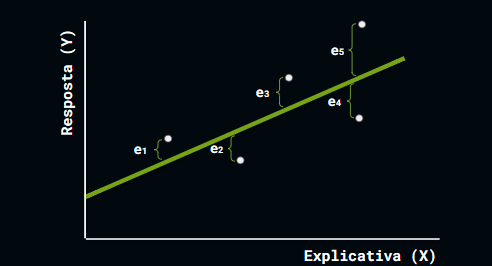

Por meio do gráfico acima, pode-se compreender o erro visualmente, de modo que é possível identificar que ele se dá em razão da diferença do valor em relação à reta, o quão distante se encontra dessa.

A integração de cada resíduo do modelo, forma o coeficiente de erro da função matemática, a qual revela percentualmente a porção que da explicação as variáveis inseridas não conseguiram explicar.

## Verificando como os resíduos estão distribuídos

In [ ]:
# Identificando alguns valores acerca dos resíduos:

residuos = modelo.resid

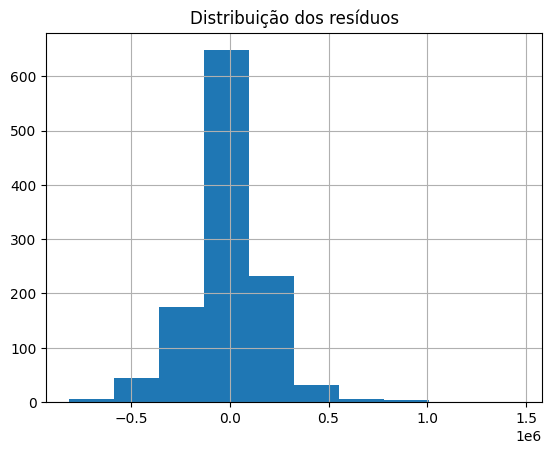

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Como eles estão distribuídos
modelo.resid.hist()
plt.title("Distribuição dos resíduos")

plt.figure(figsize = (10, 8))

plt.show()


A primeira célula indica cada resíduo do modelo, informando a distância que estão da reta de regressão linear, de modo que a célua a seguir produz o gráfico acima, que ajuda a compreender a distribuição dos erros.

Nele, pode-se compreender que os dados, em maior proporção, estão no intervalo [ -0.5 : 0.5 ], na medida em que há a maior quantidade no intervalo, aproximadamente, de [ -0.2 : 0.0 ], o que representa um bom sinal.

Compreende-se que um modelo é eficiente à medida que na distribuição dos resíduos forme uma distribuição normal ou curva Gaussiana, de modo que a maior proporção dos dados fiquem na média, cujo valor é 0, desviando-se cerca de um desvio padrão.

Caso a distribuição siga esse formato, concebe-se que nele há de modo prevalente uma proporção de erros pequenos em relação à reta, que significa que o modelo está conseguindo explicar a variável resposta.

No presente caso, a distribuição dos dados não forma uma distribuição normal, fato ocasionado justamente pela estrutura na qual se encontra os dados, que pode ser observado no gráfico gerado pelo **plotly**, ainda que seja perceptível observar que o intervalo dos erros, proporcionalmente, não seja tão elevado.

In [ ]:
# Criando o gráfico de resíduos.

# O gráfico de resíduos permite identificar como
# estão os erros na regressão linear, de modo que,
# por meio da sua distribuição é possível, também,
# identificar se as variáveis explicativas do modelo
# de regressão estão conseguindo explicar de forma
# eficiente a variável resposta.

# Criando o gráfico de dispersão dos resíduos :

fig = px.scatter(x=y_predict_train, y=residuos[:288],
                 labels={'x': 'Preço da Casa - Previsão', 'y': 'Resíduos'},
                 title='Resíduos X Previsão')

# Definindo os marcadores :
fig.update_traces(marker=dict(size=10, color='blue'))

# Ajuste o tamanho do gráfico
fig.update_layout(width=1000, height=600)

fig.show()

Analisando o gráfico dos resíduos, pode-se notar que esse não possui uma mesma distribuição, não sendo de forma homegênea aleatória, ou seja, não possui homocedasticidade.

No escopo da literatua, concebe-se que os o gráfico de resíduos devem mostrar os dados numa mesma forma e em distribuição aleatória, por meio da qual não pode ser passível de perceber um padrão sequer.

Quando o gráfico possui essa forma, compreende-se que o modelo está conseguindo, com suas variáveis explicativas, identificar a variável resposta.

Observando novamente o gráfico, nota-se que a explosão dos dados ocorre justamente durante o ponto no qual o preço das casas começam a ficar mais elevados, o que significa que, principalmente nesse cenário, as variáveis presentes no modelo não são capazes de explicar o preço para essas casas.

>

## Gráfico do resíduo esperado

>

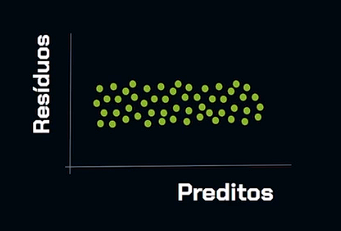

## Heterocedasticidade

Notamos que o gráfico de resíduos pela previsão dos preços não é distribuido de forma homogênea, apresentando a mudança de padrão na distribuição, o que indica a heterocedasticidade, termo utilizado na estatística para descrever uma situação na qual a variância dos erros de um modelo de regressão não é constante ao longo do intervalo de valores previstos.

A presença desse caráter na distribuição de dados, e não da homocedasticidade, é ruim, pois ela pode promover estimativas de coeficientes ineficientes e a teste de hipóteses inválidos, comprometendo a confiabilidade das inferências estatísticas. Não obstante, ainda que não interfira na previsão dos minímos quadrados ordinários, ela impacta na eficiência de tais estimadores, prejudicando a sua respectiva confiabilidade.

### Como identificar a heterocedasticidade ?

Para identificar a heterocedasticidade na relação resíduos previsão, pode-se utilizar duas principais abordagens : análise visual do gráfico da dispersão dos resíduos pelos valores previstos, de modo a identificar a forma dos dados - se possuírem mudança de padrão e um padrão bem definido, que não o de homocedasticidade, concebe-se que há a presença da heterocedasticidade.

Além desse, utiliza-se técnicas estatísticas para avaliar formalmente a presença de heterocedasticidade, como o teste de White e o teste de Breusch-Pagan, que ajudam a identificar se a variância dos resíduos está relacionada com os valores previstos.

### Tratando a heterocedasticidade :     

Para tratar a heterocedasticidade, costuma-se adotar de transformações das variáveis (por exemplo logarítmica ou raiz quadrada) ou uso de outras técnicas de regressão mais robustas, que são menos sensíveis à variância dos resíduos.